# Introduction to NLP for Feature Engineering


In [1]:
'''# Print the features of df1
print(df1.columns)

# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['feature 5'])

# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
print(df1.head())'''

"# Print the features of df1\nprint(df1.columns)\n\n# Perform one-hot encoding\ndf1 = pd.get_dummies(df1, columns=['feature 5'])\n\n# Print the new features of df1\nprint(df1.columns)\n\n# Print first five rows of df1\nprint(df1.head())"

In [2]:
# Import Dataset

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
ted = pd.read_csv('Data/ted.csv')
tweets = pd.read_csv('Data/russian_tweets.csv')
headlines = pd.read_csv('Data/fakenews.csv')

In [3]:
# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


In [4]:
# Function that returns number of words in a string
def count_words(string):
    # Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


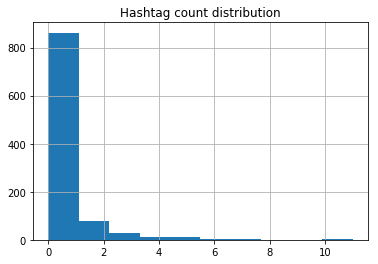

In [5]:
 # Function that returns numner of hashtags in a string
def count_hashtags(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

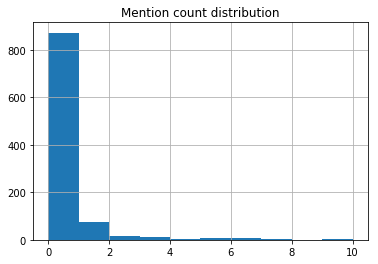

In [6]:
# Function that returns number of mentions in a string
def count_mentions(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

In [7]:
# Import Textatistic
from textatistic import Textatistic

In [8]:
#!pip install textatistic

In [9]:
'''
# Import Textatistic
from textatistic import Textatistic

# Compute the readability scores 
readability_scores = Textatistic(sisyphus_essay).scores

# Print the flesch reading ease score
flesch = readability_scores['flesch_score']
print("The Flesch Reading Ease is %.2f" % (flesch))
'''

'\n# Import Textatistic\nfrom textatistic import Textatistic\n\n# Compute the readability scores \nreadability_scores = Textatistic(sisyphus_essay).scores\n\n# Print the flesch reading ease score\nflesch = readability_scores[\'flesch_score\']\nprint("The Flesch Reading Ease is %.2f" % (flesch))\n'

In [10]:
'''
# Import Textatistic
from textatistic import Textatistic

# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
  readability_scores = Textatistic(excerpt).scores
  gunning_fog = readability_scores['gunningfog_score']
  gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)
'''

"\n# Import Textatistic\nfrom textatistic import Textatistic\n\n# List of excerpts\nexcerpts = [forbes, harvard_law, r_digest, time_kids]\n\n# Loop through excerpts and compute gunning fog index\ngunning_fog_scores = []\nfor excerpt in excerpts:\n  readability_scores = Textatistic(excerpt).scores\n  gunning_fog = readability_scores['gunningfog_score']\n  gunning_fog_scores.append(gunning_fog)\n\n# Print the gunning fog indices\nprint(gunning_fog_scores)\n"

## Tokenization and Lemmatization


In [11]:
gettysburg = """Four score and seven years ago our fathers brought forth on this continent, a new nation, 
conceived in Liberty, and dedicated to the proposition that all men are created equal. Now we're engaged
in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long 
endure. We're met on a great battlefield of that war. We've come to dedicate a portion of that field, as a 
final resting place for those who here gave their lives that that nation might live. It's altogether fitting 
and proper that we should do this. But, in a larger sense, we can't dedicate - we can not consecrate - we can 
not hallow - this ground. The brave men, living and dead, who struggled here, have consecrated it, far above 
our poor power to add or detract. The world will little note, nor long remember what we say here, but it can 
never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work 
which they who fought here have thus far so nobly advanced. It's rather for us to be here dedicated to the great 
task remaining before us - that from these honored dead we take increased devotion to that cause for which they gave 
the last full measure of devotion - that we here highly resolve that these dead shall not have died in vain - that 
this nation, under God, shall have a new birth of freedom - and that government of the people, by the people, for the 
people, shall not perish from the earth."""

In [12]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate the tokens
tokens = [token.text for token in doc]
print(tokens)

['Four', 'score', 'and', 'seven', 'years', 'ago', 'our', 'fathers', 'brought', 'forth', 'on', 'this', 'continent', ',', 'a', 'new', 'nation', ',', '\n', 'conceived', 'in', 'Liberty', ',', 'and', 'dedicated', 'to', 'the', 'proposition', 'that', 'all', 'men', 'are', 'created', 'equal', '.', 'Now', 'we', "'re", 'engaged', '\n', 'in', 'a', 'great', 'civil', 'war', ',', 'testing', 'whether', 'that', 'nation', ',', 'or', 'any', 'nation', 'so', 'conceived', 'and', 'so', 'dedicated', ',', 'can', 'long', '\n', 'endure', '.', 'We', "'re", 'met', 'on', 'a', 'great', 'battlefield', 'of', 'that', 'war', '.', 'We', "'ve", 'come', 'to', 'dedicate', 'a', 'portion', 'of', 'that', 'field', ',', 'as', 'a', '\n', 'final', 'resting', 'place', 'for', 'those', 'who', 'here', 'gave', 'their', 'lives', 'that', 'that', 'nation', 'might', 'live', '.', 'It', "'s", 'altogether', 'fitting', '\n', 'and', 'proper', 'that', 'we', 'should', 'do', 'this', '.', 'But', ',', 'in', 'a', 'larger', 'sense', ',', 'we', 'ca', "

Observe the lemmatized version of the speech. It isn't very readable to humans but it is in a much more convenient format for a machine to process

In [13]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(gettysburg)

# Generate lemmas
lemmas = [token.lemma_ for token in doc]

# Convert lemmas into a string
print(' '.join(lemmas))

four score and seven year ago -PRON- father bring forth on this continent , a new nation , 
 conceive in Liberty , and dedicate to the proposition that all man be create equal . now -PRON- be engaged 
 in a great civil war , test whether that nation , or any nation so conceive and so dedicated , can long 
 endure . -PRON- be meet on a great battlefield of that war . -PRON- have come to dedicate a portion of that field , as a 
 final resting place for those who here give -PRON- life that that nation may live . -PRON- be altogether fitting 
 and proper that -PRON- should do this . but , in a large sense , -PRON- can not dedicate - -PRON- can not consecrate - -PRON- can 
 not hallow - this ground . the brave man , live and dead , who struggle here , have consecrate -PRON- , far above 
 -PRON- poor power to add or detract . the world will little note , nor long remember what -PRON- say here , but -PRON- can 
 never forget what -PRON- do here . -PRON- be for -PRON- the living , rather , to 

In [14]:
# Importing the Libraries

import nltk

In [15]:
blog = """'\nTwenty-first-century politics has witnessed an alarming rise of populism in the U.S. and Europe. The first warning signs came with the UK Brexit Referendum vote in 2016 swinging in the way of Leave. This was followed by a stupendous victory by billionaire Donald Trump to become the 45th President of the United States in November 2016. Since then, Europe has seen a steady rise in populist and far-right parties that have capitalized on Europe’s Immigration Crisis to raise nationalist and anti-Europe sentiments. Some instances include Alternative for Germany (AfD) winning 12.6% of all seats and entering the Bundestag, thus upsetting Germany’s political order for the first time since the Second World War, the success of the Five Star Movement in Italy and the surge in popularity of neo-nazism and neo-fascism in countries such as Hungary, Czech Republic, Poland and Austria.\n'"""

stopwords = nltk.corpus.stopwords.words('english')

In this exercise, you have been given an excerpt from a blog post. Your task is to clean this text into a more machine friendly format. This will involve converting to lowercase, lemmatization and removing stopwords, punctuations and non-alphabetic characters.



In [16]:
# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(blog)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]

# It is always advisable to use your custom functions in place of isalpha() for more nuanced cases

# Print string after text cleaning
print(' '.join(a_lemmas))

twenty first century politic witness alarming rise populism Europe first warning sign come UK Brexit Referendum vote swinging way Leave This follow stupendous victory billionaire Donald Trump become President United States November Since Europe see steady rise populist far right party capitalize Europe Immigration Crisis raise nationalist anti europe sentiment instance include Alternative Germany AfD win seat enter Bundestag thus upsetting Germany political order first time since Second World War success Five Star Movement Italy surge popularity neo nazism neo fascism country Hungary Czech Republic Poland Austria


You have been a given a dataframe ted consisting of 5 TED Talks. Your task is to clean these talks using techniques discussed earlier by writing a function preprocess and applying it to the transcript feature of the dataframe.

The stopwords list is available as stopwords

In [17]:
# Function to preprocess text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'])

0      go talk new lecture TED go show illusion creat...
1      This representation brain brain break two part...
2      great honor today share Digital Universe creat...
3      passion music technology make thing combinatio...
4      use want get computer something new would prog...
                             ...                        
495    today go unpack three example iconic design ma...
496    brother belong demographic Pat say make percen...
497    John Hockenberry great Tom want start question...
498    right moment kill More car internet even littl...
499    get real problem math education right basicall...
Name: transcript, Length: 500, dtype: object


## Parts of Speech Tagging

In [18]:
lotf = "He found himself understanding the wearisomeness of this life, where every path was an improvisation and a considerable part of one’s waking life was spent watching one’s feet."

In [19]:
# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(lotf)

# Generate tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('He', 'PRON'), ('found', 'VERB'), ('himself', 'PRON'), ('understanding', 'VERB'), ('the', 'DET'), ('wearisomeness', 'NOUN'), ('of', 'ADP'), ('this', 'DET'), ('life', 'NOUN'), (',', 'PUNCT'), ('where', 'ADV'), ('every', 'DET'), ('path', 'NOUN'), ('was', 'VERB'), ('an', 'DET'), ('improvisation', 'NOUN'), ('and', 'CCONJ'), ('a', 'DET'), ('considerable', 'ADJ'), ('part', 'NOUN'), ('of', 'ADP'), ('one', 'NUM'), ('’s', 'PROPN'), ('waking', 'VERB'), ('life', 'NOUN'), ('was', 'VERB'), ('spent', 'VERB'), ('watching', 'VERB'), ('one', 'NUM'), ('’s', 'PROPN'), ('feet', 'NOUN'), ('.', 'PUNCT')]


In [20]:
nlp = spacy.load('en_core_web_sm')

# Returns number of proper nouns
def proper_nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3


In [21]:
nlp = spacy.load('en_core_web_sm')

# Returns number of other nouns
def nouns(text, model=nlp):
  	# Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

2


#### Noun usage in fake news


In [22]:
headlines['num_propn'] = headlines['title'].apply(proper_nouns)
headlines['num_noun'] = headlines['title'].apply(nouns)

# Compute mean of proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()

# Compute mean of other nouns
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

# Print results
print("Mean no. of proper nouns in real and fake headlines are %.2f and %.2f respectively"%(real_propn, fake_propn))
print("Mean no. of other nouns in real and fake headlines are %.2f and %.2f respectively"%(real_noun, fake_noun))

Mean no. of proper nouns in real and fake headlines are 2.65 and 4.79 respectively
Mean no. of other nouns in real and fake headlines are 2.39 and 1.67 respectively


## Named Entity Recognition

In [23]:
# Load the required model
nlp = spacy.load("en_core_web_sm")

# Create a Doc instance 
text = 'Sundar Pichai is the CEO of Google. Its headquarters is in Mountain View.'
doc = nlp(text)

# Print all named entities and their labels
for ent in doc.ents:
    print(ent.text, ent.label_)

Sundar Pichai PERSON
Google ORG
Mountain View GPE


In [24]:
tc = """It’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence 
around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation 
around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at
the table shaping it.
"""

In [25]:
def find_persons(text):
  # Create Doc object
  doc = nlp(text)
  
  # Identify the persons
  persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  
  # Return persons
  return persons

print(find_persons(tc))

['Facebook  ', 'Sheryl Sandberg', 'Mark Zuckerberg', 'Facebook']


The article was related to Facebook and our function correctly identified both the people mentioned. You can now see how NER could be used in a variety of applications. Publishers may use a technique like this to classify news articles by the people mentioned in them. A question answering system could also use something like this to answer questions such as 'Who are the people mentioned in this passage?'. With this, we come to an end of this chapter.

# Building a Bag of Words Model

You have been provided with a corpus of more than 7000 movie tag lines. Your job is to generate the bag of words representation bow_matrix for these taglines. For this exercise, we will ignore the text preprocessing step and generate bow_matrix directly.



In [26]:
corpus= ['The lion is the king of the jungle', 'Lions have lifespans of a decade', 'The lion is an endangered species']

In [27]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_lem_matrix = vectorizer.fit_transform(corpus)

# Print the shape of bow_lem_matrix
print(bow_lem_matrix.shape)

(3, 13)


In [28]:

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names()

# Print bow_df
print(bow_df)

# get_feature_names() essentially gives us a list which represents the mapping of the feature indices to the feature name in 
# the vocabulary.

   an  decade  endangered  have  is  jungle  king  lifespans  lion  lions  of  \
0   0       0           0     0   1       1     1          0     1      0   1   
1   0       1           0     1   0       0     0          1     0      1   1   
2   1       0           1     0   1       0     0          0     1      0   0   

   species  the  
0        0    3  
1        0    0  
2        1    1  


## Building a BOW Naive Bayes Classifier

In [29]:
movrev = pd.read_csv('Data/movie_reviews_clean.csv')

In [30]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(movrev['review'], movrev['sentiment'], test_size=0.25)

In [31]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

(750, 14744)
(250, 14744)


In [32]:
# Import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.808
The sentiment predicted by the classifier is 0


## Building n-gram models

BOW is where n=1. N grams. eg: a 3 N gram represent 3 words together -> (Hi Hello How) (are you im) (fine i like)

In [33]:
# n-gram models for movie tag lines

corpus = movrev['review'] # Its not for Movie, but for Old Review Data

In [37]:
# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(corpus)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

ng1, ng2 and ng3 have 17782, 134432 and 322694 features respectively


**As the n-gram range increases, so does the number of features, leading to increased computational costs and a problem known as the curse of dimensionality.**

The n-gram training reviews are available as X_train_ng. The corresponding test reviews are available as X_test_ng. Finally, use y_train and y_test to access the training and test sentiment classes respectively.



In [39]:
'''
# Define an instance of MultinomialNB 
clf_ng = MultinomialNB()

# Fit the classifier 
clf_ng.fit(X_train_ng, y_train)

# Measure the accuracy 
accuracy = clf_ng.score(X_test_ng, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(ng_vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))
'''

'\n# Define an instance of MultinomialNB \nclf_ng = MultinomialNB()\n\n# Fit the classifier \nclf_ng.fit(X_train_ng, y_train)\n\n# Measure the accuracy \naccuracy = clf_ng.score(X_test_ng, y_test)\nprint("The accuracy of the classifier on the test set is %.3f" % accuracy)\n\n# Predict the sentiment of a negative review\nreview = "The movie was not good. The plot had several holes and the acting lacked panache."\nprediction = clf_ng.predict(ng_vectorizer.transform([review]))[0]\nprint("The sentiment predicted by the classifier is %i" % (prediction))\n'

#### Comparing performance of n-gram models


In [40]:
# With N Gram Range 1 : 1Gram/NGram

import time

start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(movrev['review'], movrev['sentiment'], test_size=0.5, random_state=42, stratify=movrev['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer()
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 0.256 seconds to complete. The accuracy on the test set is 0.75. The ngram representation had 12347 features.


In [41]:
# With N Gram Range upto 3 : 3Gram

start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(movrev['review'], movrev['sentiment'], test_size=0.5, random_state=42, stratify=movrev['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer(ngram_range = (1,3))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 1.616 seconds to complete. The accuracy on the test set is 0.77. The ngram representation had 178240 features.


The program took around 0.2 seconds in the case of the unigram model and more than 10 times longer for the higher order n-gram model. The unigram model had over 12,000 features whereas the n-gram model for upto n=3 had over 178,000! Despite taking higher computation time and generating more features, the classifier only performs marginally better in the latter case, producing an accuracy of 77% in comparison to the 75% for the unigram model.

# Building tf-idf document vectors
As Vector Representations gets more charecterized by Dimensions - (Humans occuring 5 times). Weighting words on a Particular Way

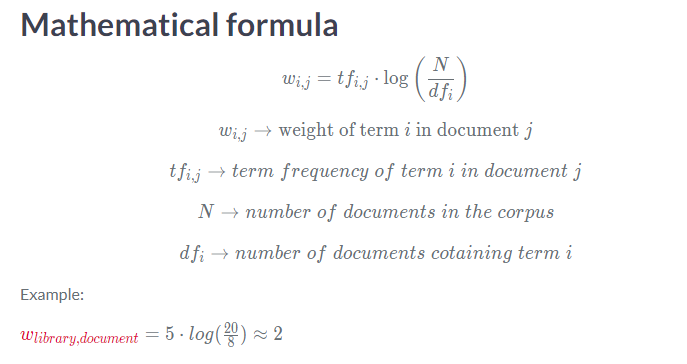

In [42]:
ted = ted['transcript']

In [43]:
 # Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(500, 21956)


#### Cosine Similarity

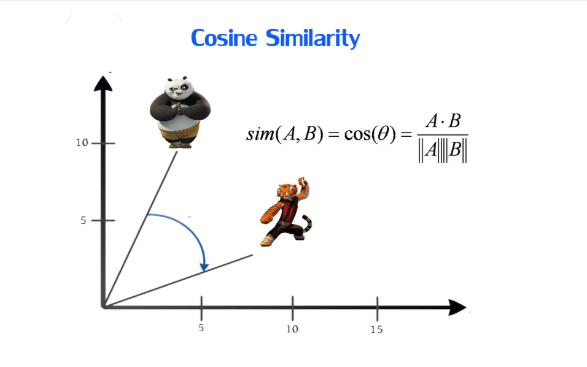

In [44]:
# Import Libraries
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

# Initialize numpy vectors
A = np.array([1,3])
B = np.array([-2,2])

# Compute dot product
dot_prod = np.dot(A, B)

# Print dot product
print(dot_prod)

4


In [45]:
# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.0817972  0.07474549 ... 0.06578764 0.0866769  0.15079147]
 [0.0817972  1.         0.07538805 ... 0.04409003 0.06637568 0.10458729]
 [0.07474549 0.07538805 1.         ... 0.0844377  0.09654146 0.15105839]
 ...
 [0.06578764 0.04409003 0.0844377  ... 1.         0.06806728 0.1166474 ]
 [0.0866769  0.06637568 0.09654146 ... 0.06806728 1.         0.11611499]
 [0.15079147 0.10458729 0.15105839 ... 0.1166474  0.11611499 1.        ]]


computing the cosine similarity matrix lies at the heart of many practical systems such as recommenders. From our similarity matrix, we see that the first and the second sentence are the most similar. Also the fifth sentence has, on average, the lowest pairwise cosine scores. This is intuitive as it contains entities that are not present in the other sentences.



### Building a plot line based recommender


We cosine_similarity and then, using linear_kernel we create a recommendation System. See the time taken by linear_kernel is much faster than cosine_similarity, but Output is Same

In [46]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.0817972  0.07474549 ... 0.06578764 0.0866769  0.15079147]
 [0.0817972  1.         0.07538805 ... 0.04409003 0.06637568 0.10458729]
 [0.07474549 0.07538805 1.         ... 0.0844377  0.09654146 0.15105839]
 ...
 [0.06578764 0.04409003 0.0844377  ... 1.         0.06806728 0.1166474 ]
 [0.0866769  0.06637568 0.09654146 ... 0.06806728 1.         0.11611499]
 [0.15079147 0.10458729 0.15105839 ... 0.1166474  0.11611499 1.        ]]
Time taken: 0.1039426326751709 seconds


In [47]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.0817972  0.07474549 ... 0.06578764 0.0866769  0.15079147]
 [0.0817972  1.         0.07538805 ... 0.04409003 0.06637568 0.10458729]
 [0.07474549 0.07538805 1.         ... 0.0844377  0.09654146 0.15105839]
 ...
 [0.06578764 0.04409003 0.0844377  ... 1.         0.06806728 0.1166474 ]
 [0.0866769  0.06637568 0.09654146 ... 0.06806728 1.         0.11611499]
 [0.15079147 0.10458729 0.15105839 ... 0.1166474  0.11611499 1.        ]]
Time taken: 0.08794975280761719 seconds


Notice how both linear_kernel and cosine_similarity produced the same result. However, linear_kernel took a smaller amount of time to execute. When you're working with a very large amount of data and your vectors are in the tf-idf representation, it is good practice to default to linear_kernel to improve performance. (NOTE: In case, you see linear_kernel taking more time, it's because the dataset we're dealing with is extremely small and Python's time module is incapable of capture such minute time differences accurately)

In [48]:
movie_plots = pd.read_csv('Data/movie_overviews.csv')

In [49]:
movie_plots.head()

,id,title,overview,tagline
0,862,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN
1,8844,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
2,15602,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
3,31357,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
4,11862,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...


In [50]:
movie_plots = movie_plots['overview']

In [52]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movie_plots)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('The Dark Knight Rises', cosine_sim, indices))

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [57]:
metadata = pd.read_csv('Data/movie_overviews.csv', usecols=['title', 'tagline'])
transcripts = pd.read_csv('Data/ted.csv')

In [55]:
# Generate mapping between titles and index
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

def get_recommendations(title, cosine_sim, indices):
    # Get index of movie that matches title
    idx = indices[title]
    # Sort the movies based on the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [58]:
ted

0      go talk new lecture TED go show illusion creat...
1      This representation brain brain break two part...
2      great honor today share Digital Universe creat...
3      passion music technology make thing combinatio...
4      use want get computer something new would prog...
                             ...                        
495    today go unpack three example iconic design ma...
496    brother belong demographic Pat say make percen...
497    John Hockenberry great Tom want start question...
498    right moment kill More car internet even littl...
499    get real problem math education right basicall...
Name: transcript, Length: 500, dtype: object

In [60]:
# Initialize the TfidfVectorizer 
tfidf = TfidfVectorizer(stop_words = 'english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(ted)

# Generate the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
 
# Generate recommendations 
print(get_recommendations('This representation brain brain break', cosine_sim, indices))

KeyError: 'This representation brain brain break'

## Beyond N Grams: Word Embeddings

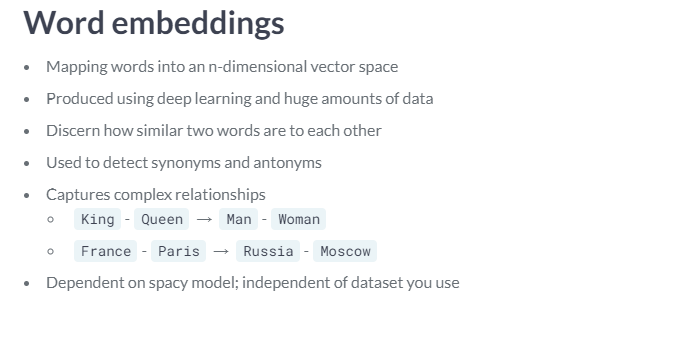

In [63]:
sent = 'I like apples and oranges'
import warnings

warnings.filterwarnings('ignore')

In [64]:
# Create the doc object
doc = nlp(sent)

# Compute pairwise similarity scores
for token1 in doc:
  for token2 in doc:
    print(token1.text, token2.text, token1.similarity(token2))

I I 1.0
I like -0.030447574
I apples 0.068964474
I and 0.0018687353
I oranges 0.10695108
like I -0.030447574
like like 1.0
like apples 0.01801711
like and 0.03228806
like oranges -0.14245993
apples I 0.068964474
apples like 0.01801711
apples apples 1.0
apples and -0.06515776
apples oranges 0.60567147
and I 0.0018687353
and like 0.03228806
and apples -0.06515776
and and 1.0
and oranges 0.109119244
oranges I 0.10695108
oranges like -0.14245993
oranges apples 0.60567147
oranges and 0.109119244
oranges oranges 1.0


In [66]:
mother = "\nMother do you think they'll drop the bomb?\nMother do you think they'll like this song?\nMother do you think they'll try to break my balls?\nOoh, ah\nMother should I build the wall?\nMother should I run for President?\nMother should I trust the government?\nMother will they put me in the firing mine?\nOoh ah,\nIs it just a waste of time?\nHush now baby, baby, don't you cry.\nMama's gonna make all your nightmares come true.\nMama's gonna put all her fears into you.\nMama's gonna keep you right here under her wing.\nShe won't let you fly, but she might let you sing.\nMama's gonna keep baby cozy and warm.\nOoh baby, ooh baby, ooh baby,\nOf course mama's gonna help build the wall.\nMother do you think she's good enough, for me?\nMother do you think she's dangerous, to me?\nMother will she tear your little boy apart?\nOoh ah,\nMother will she break my heart?\nHush now baby, baby don't you cry.\nMama's gonna check out all your girlfriends for you.\nMama won't let anyone dirty get through.\nMama's gonna wait up until you get in.\nMama will always find out where you've been.\nMama's gonna keep baby healthy and clean.\nOoh baby, ooh baby, ooh baby,\nYou'll always be baby to me.\nMother, did it need to be so high?\n"
hopes = "\nBeyond the horizon of the place we lived when we were young\nIn a world of magnets and miracles\nOur thoughts strayed constantly and without boundary\nThe ringing of the division bell had begun\nAlong the Long Road and on down the Causeway\nDo they still meet there by the Cut\nThere was a ragged band that followed in our footsteps\nRunning before times took our dreams away\nLeaving the myriad small creatures trying to tie us to the ground\nTo a life consumed by slow decay\nThe grass was greener\nThe light was brighter\nWhen friends surrounded\nThe nights of wonder\nLooking beyond the embers of bridges glowing behind us\nTo a glimpse of how green it was on the other side\nSteps taken forwards but sleepwalking back again\nDragged by the force of some in a tide\nAt a higher altitude with flag unfurled\nWe reached the dizzy heights of that dreamed of world\nEncumbered forever by desire and ambition\nThere's a hunger still unsatisfied\nOur weary eyes still stray to the horizon\nThough down this road we've been so many times\nThe grass was greener\nThe light was brighter\nThe taste was sweeter\nThe nights of wonder\nWith friends surrounded\nThe dawn mist glowing\nThe water flowing\nThe endless river\nForever and ever\n"
hey = "\nHey you, out there in the cold\nGetting lonely, getting old\nCan you feel me?\nHey you, standing in the aisles\nWith itchy feet and fading smiles\nCan you feel me?\nHey you, don't help them to bury the light\nDon't give in without a fight\nHey you out there on your own\nSitting naked by the phone\nWould you touch me?\nHey you with you ear against the wall\nWaiting for someone to call out\nWould you touch me?\nHey you, would you help me to carry the stone?\nOpen your heart, I'm coming home\nBut it was only fantasy\nThe wall was too high\nAs you can see\nNo matter how he tried\nHe could not break free\nAnd the worms ate into his brain\nHey you, out there on the road\nAlways doing what you're told\nCan you help me?\nHey you, out there beyond the wall\nBreaking bottles in the hall\nCan you help me?\nHey you, don't tell me there's no hope at all\nTogether we stand, divided we fall\n"

In [67]:
# Create Doc objects
mother_doc = nlp(mother)
hopes_doc = nlp(hopes)
hey_doc = nlp(hey)

# Print similarity between mother and hopes
print(mother_doc.similarity(hopes_doc))

# Print similarity between mother and hey
print(mother_doc.similarity(hey_doc))

0.6325932303705761
0.9027856297456617
